# 국면 예측작업(피처 추출 및 성능평가를 통한 모델 선택)

In [ ]:
# 드라이브에 마운트
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/project


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.pylab import rcParams
import warnings
import statsmodels.api as sm
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
rcParams['figure.figsize'] = 16,6

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,813 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

In [ ]:
df = pd.read_csv('df_monthly_return(regime).csv', index_col='date', parse_dates=True)
df

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
df.corr()

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
TK_CL1 Comdty,1.000000,0.078124,-0.262053,0.193025,0.316449,-0.057406,0.176485,0.173231,0.071057,0.112324,0.158257,-0.019499,-0.179983,0.279453,-0.000753,-0.006599,-0.264224
TK_DAX Index,0.078124,1.000000,0.068658,-0.093709,0.234099,-0.035605,0.370162,0.459796,0.103753,0.026098,0.679559,0.159615,-0.228361,0.150600,-0.008013,-0.055167,-0.227215
TK_DXY Curncy,-0.262053,0.068658,1.000000,-0.365788,-0.238053,0.067708,-0.073037,-0.038389,-0.113953,-0.008375,-0.111570,0.567807,0.268499,-0.292357,-0.028900,-0.024737,0.051808
TK_GC1 Comdty,0.193025,-0.093709,-0.365788,1.000000,0.221759,-0.107966,0.030706,-0.060855,0.146088,-0.041870,-0.009254,-0.294071,-0.156640,0.694628,0.064378,-0.021877,0.117892
TK_HG1 Comdty,0.316449,0.234099,-0.238053,0.221759,1.000000,-0.025859,0.304787,0.168842,0.182943,0.078069,0.332125,0.007935,-0.314246,0.297590,0.006998,-0.069810,-0.285723
TK_KOCPI Index,-0.057406,-0.035605,0.067708,-0.107966,-0.025859,1.000000,-0.003714,-0.062201,-0.052736,0.232600,-0.071980,0.031984,0.037858,-0.036634,-0.532623,0.590289,0.003181
TK_KOSPI Index,0.176485,0.370162,-0.073037,0.030706,0.304787,-0.003714,1.000000,0.417684,0.065227,0.071827,0.399572,-0.104742,-0.315827,0.197177,-0.032452,-0.111144,-0.162160
TK_NKY Index,0.173231,0.459796,-0.038389,-0.060855,0.168842,-0.062201,0.417684,1.000000,0.132209,0.088639,0.519852,0.145373,-0.241808,0.095920,-0.009118,-0.119770,-0.198768
TK_S 1 Comdty,0.071057,0.103753,-0.113953,0.146088,0.182943,-0.052736,0.065227,0.132209,1.000000,-0.001472,0.142890,-0.010599,-0.201996,0.128128,0.037175,-0.036907,-0.037767
TK_SKLILI Index,0.112324,0.026098,-0.008375,-0.041870,0.078069,0.232600,0.071827,0.088639,-0.001472,1.000000,0.018301,-0.084904,-0.077957,-0.012124,-0.713969,0.280170,-0.034248


In [ ]:
df.columns

Index(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_HG1 Comdty', 'TK_KOCPI Index', 'TK_KOSPI Index', 'TK_NKY Index',
       'TK_S 1 Comdty', 'TK_SKLILI Index', 'TK_SPX Index',
       'TK_USDJPY BGN Curncy', 'TK_USDKRW BGN Curncy', 'TK_XAU Index', '국면',
       'TK_LT12TRUU Index', 'TK_LUTLTRUU Index'],
      dtype='object')

In [ ]:
df.columns = ['경질 원유 선물', '독일 DAX 30지수', '달러인덱스', '금 선물',
       '구리 선물', '한국소비자물가지수', '코스피지수', '닛케이 225지수',
       '대두 선물', '한국종합선행지수', 'S&P 500지수',
       'USDJPY 현물환율(기준통화USD)', 'USDKRW 현물환율(기준통화USD)', '필라델피아 금은지수', '국면',
       'US 국고단기채', 'US 국고장기채']

In [ ]:
# 피처 앤지니어링
df_test = df.copy()
df_test

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_HG1 Comdty', 'TK_KOCPI Index', 'TK_KOSPI Index', 'TK_NKY Index',
       'TK_S 1 Comdty', 'TK_SKLILI Index', 'TK_SPX Index',
       'TK_USDJPY BGN Curncy', 'TK_USDKRW BGN Curncy', 'TK_XAU Index', '국면',
       'TK_LT12TRUU Index', 'TK_LUTLTRUU Index']

In [ ]:
# csv파일로 저장
df.to_csv(
    path_or_buf = '/content/drive/MyDrive/project/df_hangul.csv',
    index = True,
    sep = ',',      # 구분기호 설정
    encoding = 'utf-8',
    float_format='%f',     # 숫자 자리수 모두 표시
)

In [ ]:
df= pd.read_csv('df_hangul.csv', index_col='date', parse_dates=True)
df

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,한국소비자물가지수,코스피지수,닛케이 225지수,대두 선물,한국종합선행지수,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,국면,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


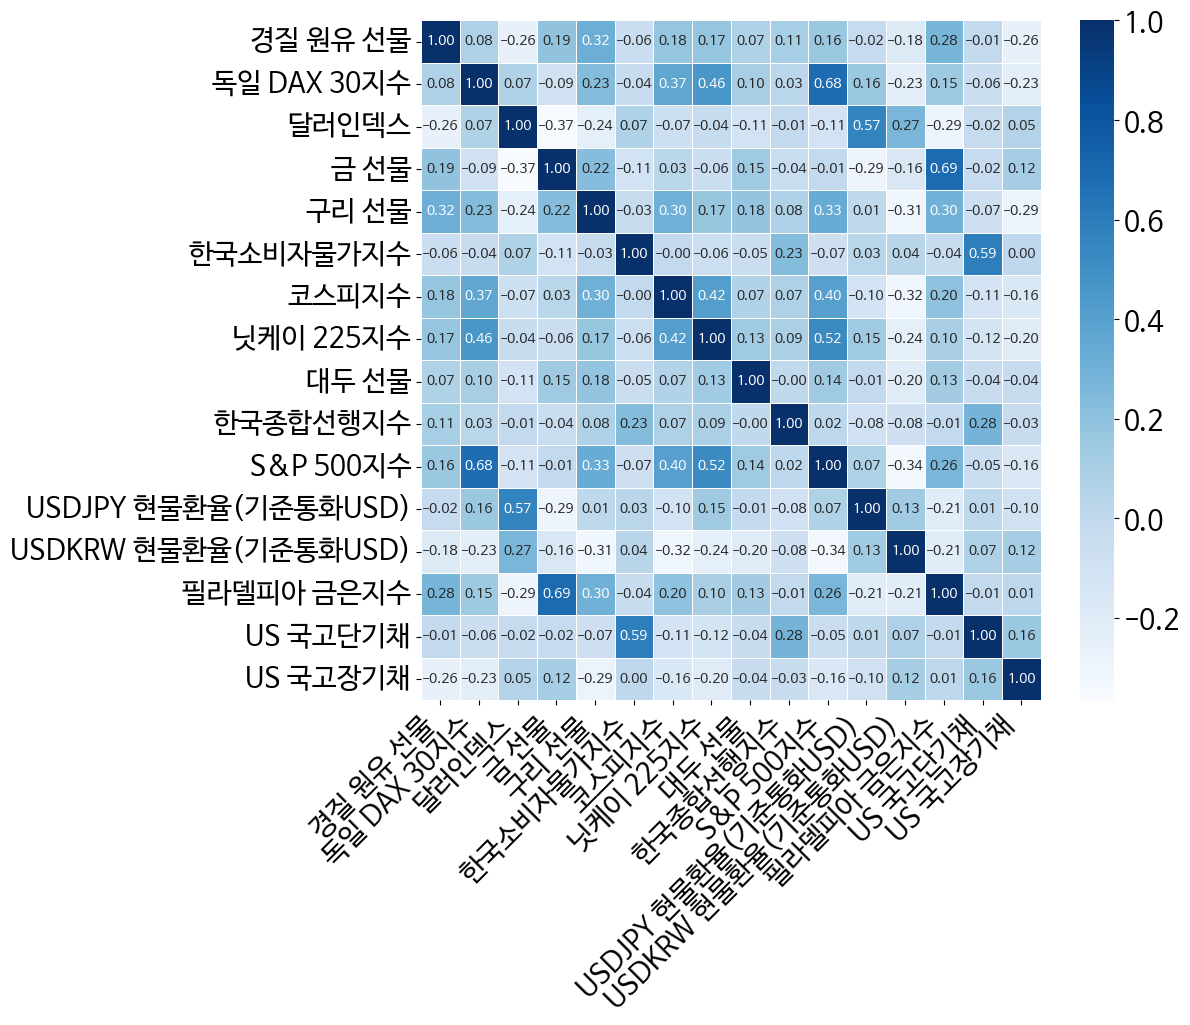

In [ ]:
from datetime import datetime, timedelta
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df.drop(columns='국면').corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')
fig.autofmt_xdate(rotation=45)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [ ]:
df_test = df.copy()
df_test

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


### 국면 예측을 위해 3개월 땡겨주는 것(classification model을 돌리기 위한 시계열 해체 작업)

In [ ]:
df_test['국면'] = df_test.shift(-3)['국면']
df_test

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1.0,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1.0,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1.0,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1.0,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1.0,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4.0,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4.0,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,NaN,0.002724,0.068340


In [ ]:
df_test = df_test[:-3]
df_test

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1.0,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1.0,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1.0,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1.0,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1.0,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,0.039678,0.004661,-0.054143,0.026269,-0.004259,0.047664,0.055075,0.057793,0.018535,0.024248,0.017319,-0.011901,-0.117853,4.0,0.001832,-0.021883
2019-10-31,0.010444,0.049166,-0.017916,0.022132,0.030268,0.000000,0.005337,0.047603,-0.002991,0.023810,0.033096,0.002599,-0.029546,0.079964,4.0,0.002267,-0.017879
2019-11-30,-0.018327,0.021243,0.010634,-0.030303,-0.004146,0.001528,-0.005828,0.019393,-0.051393,0.030864,0.024151,0.012016,0.013650,-0.004378,4.0,0.001167,-0.013492


In [ ]:
df_test['국면'] = df_test['국면'].astype('int')
df_test

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,0.039678,0.004661,-0.054143,0.026269,-0.004259,0.047664,0.055075,0.057793,0.018535,0.024248,0.017319,-0.011901,-0.117853,4,0.001832,-0.021883
2019-10-31,0.010444,0.049166,-0.017916,0.022132,0.030268,0.000000,0.005337,0.047603,-0.002991,0.023810,0.033096,0.002599,-0.029546,0.079964,4,0.002267,-0.017879
2019-11-30,-0.018327,0.021243,0.010634,-0.030303,-0.004146,0.001528,-0.005828,0.019393,-0.051393,0.030864,0.024151,0.012016,0.013650,-0.004378,4,0.001167,-0.013492


In [ ]:
df_cut = df_test.loc['1989-01-31':]
df_cut

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1989-01-31,-0.019009,-0.016689,0.049463,-0.052733,0.036893,0.067782,-0.038408,0.044229,-0.036327,0.072650,0.080491,0.043583,-0.005819,0.053540,1,0.005066,-0.020756
1989-02-28,0.036551,-0.009119,-0.019525,-0.008382,-0.002872,0.054074,0.035210,0.019927,-0.006516,0.076271,-0.027702,-0.021065,-0.011266,0.115738,1,0.006622,0.010665
1989-03-31,0.104486,0.011788,0.026654,-0.005167,-0.087154,0.046178,0.094910,0.027355,-0.016242,0.080169,0.027028,0.036456,-0.001776,-0.040843,1,0.010309,0.025407
1989-04-30,0.023559,0.019749,0.004420,-0.014759,0.099309,0.052456,-0.066712,0.020316,0.017430,0.079498,0.044705,0.006058,-0.007125,-0.049984,1,0.008941,0.036788
1989-05-31,-0.036786,0.032843,0.048604,-0.045705,-0.158178,0.060219,-0.014204,0.014014,-0.028819,0.087500,0.036879,0.061610,0.000598,-0.025203,1,0.010114,0.057119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,0.039678,0.004661,-0.054143,0.026269,-0.004259,0.047664,0.055075,0.057793,0.018535,0.024248,0.017319,-0.011901,-0.117853,4,0.001832,-0.021883
2019-10-31,0.010444,0.049166,-0.017916,0.022132,0.030268,0.000000,0.005337,0.047603,-0.002991,0.023810,0.033096,0.002599,-0.029546,0.079964,4,0.002267,-0.017879
2019-11-30,-0.018327,0.021243,0.010634,-0.030303,-0.004146,0.001528,-0.005828,0.019393,-0.051393,0.030864,0.024151,0.012016,0.013650,-0.004378,4,0.001167,-0.013492


In [ ]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 1989-01-31 to 2020-01-31
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TK_CL1 Comdty         373 non-null    float64
 1   TK_DAX Index          373 non-null    float64
 2   TK_DXY Curncy         373 non-null    float64
 3   TK_GC1 Comdty         373 non-null    float64
 4   TK_HG1 Comdty         373 non-null    float64
 5   TK_KOCPI Index        373 non-null    float64
 6   TK_KOSPI Index        373 non-null    float64
 7   TK_NKY Index          373 non-null    float64
 8   TK_S 1 Comdty         373 non-null    float64
 9   TK_SKLILI Index       373 non-null    float64
 10  TK_SPX Index          373 non-null    float64
 11  TK_USDJPY BGN Curncy  373 non-null    float64
 12  TK_USDKRW BGN Curncy  373 non-null    float64
 13  TK_XAU Index          373 non-null    float64
 14  국면                    373 non-null    int64  
 15  TK_L

In [ ]:
df_cut.drop(columns=['TK_KOCPI Index', 'TK_SKLILI Index'],inplace=True)
df_cut

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,
1989-01-31,-0.019009,-0.016689,0.049463,-0.052733,0.036893,-0.038408,0.044229,-0.036327,0.080491,0.043583,-0.005819,0.053540,1,0.005066,-0.020756
1989-02-28,0.036551,-0.009119,-0.019525,-0.008382,-0.002872,0.035210,0.019927,-0.006516,-0.027702,-0.021065,-0.011266,0.115738,1,0.006622,0.010665
1989-03-31,0.104486,0.011788,0.026654,-0.005167,-0.087154,0.094910,0.027355,-0.016242,0.027028,0.036456,-0.001776,-0.040843,1,0.010309,0.025407
1989-04-30,0.023559,0.019749,0.004420,-0.014759,0.099309,-0.066712,0.020316,0.017430,0.044705,0.006058,-0.007125,-0.049984,1,0.008941,0.036788
1989-05-31,-0.036786,0.032843,0.048604,-0.045705,-0.158178,-0.014204,0.014014,-0.028819,0.036879,0.061610,0.000598,-0.025203,1,0.010114,0.057119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,0.039678,0.004661,-0.054143,0.026269,0.047664,0.055075,0.057793,0.024248,0.017319,-0.011901,-0.117853,4,0.001832,-0.021883
2019-10-31,0.010444,0.049166,-0.017916,0.022132,0.030268,0.005337,0.047603,-0.002991,0.033096,0.002599,-0.029546,0.079964,4,0.002267,-0.017879
2019-11-30,-0.018327,0.021243,0.010634,-0.030303,-0.004146,-0.005828,0.019393,-0.051393,0.024151,0.012016,0.013650,-0.004378,4,0.001167,-0.013492


In [ ]:
df_cut['국면'] = df_cut['국면'] - 1
df_cut

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1989-01-31,-0.019009,-0.016689,0.049463,-0.052733,0.036893,0.067782,-0.038408,0.044229,-0.036327,0.072650,0.080491,0.043583,-0.005819,0.053540,0,0.005066,-0.020756
1989-02-28,0.036551,-0.009119,-0.019525,-0.008382,-0.002872,0.054074,0.035210,0.019927,-0.006516,0.076271,-0.027702,-0.021065,-0.011266,0.115738,0,0.006622,0.010665
1989-03-31,0.104486,0.011788,0.026654,-0.005167,-0.087154,0.046178,0.094910,0.027355,-0.016242,0.080169,0.027028,0.036456,-0.001776,-0.040843,0,0.010309,0.025407
1989-04-30,0.023559,0.019749,0.004420,-0.014759,0.099309,0.052456,-0.066712,0.020316,0.017430,0.079498,0.044705,0.006058,-0.007125,-0.049984,0,0.008941,0.036788
1989-05-31,-0.036786,0.032843,0.048604,-0.045705,-0.158178,0.060219,-0.014204,0.014014,-0.028819,0.087500,0.036879,0.061610,0.000598,-0.025203,0,0.010114,0.057119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,0.039678,0.004661,-0.054143,0.026269,-0.004259,0.047664,0.055075,0.057793,0.018535,0.024248,0.017319,-0.011901,-0.117853,3,0.001832,-0.021883
2019-10-31,0.010444,0.049166,-0.017916,0.022132,0.030268,0.000000,0.005337,0.047603,-0.002991,0.023810,0.033096,0.002599,-0.029546,0.079964,3,0.002267,-0.017879
2019-11-30,-0.018327,0.021243,0.010634,-0.030303,-0.004146,0.001528,-0.005828,0.019393,-0.051393,0.030864,0.024151,0.012016,0.013650,-0.004378,3,0.001167,-0.013492


In [ ]:
df_cut.drop(columns=['TK_DAX Index', 'TK_DXY Curncy', 'TK_KOCPI Index', 'TK_NKY Index',
        'TK_SKLILI Index', 'TK_XAU Index',],inplace=True)
df_cut

,TK_CL1 Comdty,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,
1989-01-31,-0.019009,-0.052733,0.036893,-0.038408,-0.036327,0.080491,0.043583,-0.005819,0,0.005066,-0.020756
1989-02-28,0.036551,-0.008382,-0.002872,0.035210,-0.006516,-0.027702,-0.021065,-0.011266,0,0.006622,0.010665
1989-03-31,0.104486,-0.005167,-0.087154,0.094910,-0.016242,0.027028,0.036456,-0.001776,0,0.010309,0.025407
1989-04-30,0.023559,-0.014759,0.099309,-0.066712,0.017430,0.044705,0.006058,-0.007125,0,0.008941,0.036788
1989-05-31,-0.036786,-0.045705,-0.158178,-0.014204,-0.028819,0.036879,0.061610,0.000598,0,0.010114,0.057119
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,0.002410,-0.054143,0.026269,0.047664,0.057793,0.024248,0.017319,-0.011901,3,0.001832,-0.021883
2019-10-31,0.010444,0.022132,0.030268,0.005337,-0.002991,0.033096,0.002599,-0.029546,3,0.002267,-0.017879
2019-11-30,-0.018327,-0.030303,-0.004146,-0.005828,-0.051393,0.024151,0.012016,0.013650,3,0.001167,-0.013492


In [ ]:
df_cut.to_csv(
    path_or_buf = '/content/drive/MyDrive/project/df_train_set.csv',
    index = True,
    sep = ',',      # 구분기호 설정
    encoding = 'utf-8',
    float_format='%f',     # 숫자 자리수 모두 표시
)

In [ ]:
# features/target, train/test dataset 분리
# 다운 될 때 대비용
# df_cut = pd.read_csv('df_train_set.csv', index_col='date', parse_dates=True)

feature_columns = list(df_cut.columns.difference(['국면']))
X = df_cut[feature_columns]
y = df_cut['국면']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)#, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

(298, 10) (75, 10) (298,) (75,)


In [ ]:
X_train

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,
2005-01-31,0.144349,-0.008547,0.027921,-0.018385,-0.026128,0.043627,0.001594,0.024231,-0.011301,-0.041880,-0.017312,0.008951,-0.011656,-0.044433
1995-04-30,0.070941,0.042890,-0.000611,-0.010695,-0.066835,-0.039707,0.006145,0.010245,0.092675,-0.026191,0.025625,-0.017589,-0.013665,-0.041400
1996-01-31,-0.104493,0.081090,0.031763,0.034958,-0.027942,-0.011284,0.003391,-0.004164,0.009445,-0.013026,0.024632,0.034799,0.014282,0.115196
2019-02-28,0.035469,0.029961,0.006047,-0.000607,0.063830,-0.003640,0.001860,-0.013519,0.028707,-0.022065,0.028804,0.017260,0.004853,-0.000790
1990-05-31,-0.078390,0.000542,-0.002255,-0.022538,-0.092138,0.110655,0.007255,0.023010,0.115897,-0.032078,0.087223,-0.039093,0.008319,0.073163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-12-31,-0.003367,0.029312,-0.005493,0.015320,-0.001801,-0.036428,0.006217,0.014669,0.037313,-0.010777,0.023055,0.002012,-0.006192,0.065698
1997-11-30,-0.086355,0.024667,0.017695,-0.055662,-0.070757,-0.179719,0.003913,0.020258,0.008252,0.001743,0.017476,0.053130,0.202123,-0.197689
2011-07-31,0.008005,-0.035133,-0.006079,0.098273,0.043686,0.003514,0.000000,0.055672,-0.003551,0.024201,-0.035374,-0.050353,-0.011794,0.031888


In [ ]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(y_test,predict1))

0.6533333333333333


In [ ]:
  from sklearn.model_selection import GridSearchCV

  grid = {
      'n_estimators' : [100,200,300,400,500],
      'max_depth' : [2,3,5,6,8,10,12],
      'min_samples_leaf' : [3,5,7,10],
      'min_samples_split' : [2,3,5,10]
  }

  classifier_grid = GridSearchCV(clf, param_grid = grid, scoring="accuracy", n_jobs=-1, verbose =1)

  classifier_grid.fit(X_train, y_train)

  print("최고 평균 정확도 : {}".format(classifier_grid.best_score_))
  print("최고의 파라미터 :", classifier_grid.best_params_)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
최고 평균 정확도 : 0.6948587570621468
최고의 파라미터 : {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=0,min_samples_leaf=3, min_samples_split= 2)
clf.fit(X_train,y_train)

predict2 = clf.predict(X_test)
print(accuracy_score(y_test,predict2))

0.6533333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

confusion_matrix(y_test, predict2)

array([[17,  0,  1,  4],
       [ 1,  1,  0,  7],
       [ 5,  0,  0,  6],
       [ 2,  0,  0, 31]])

In [ ]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        22
           1       1.00      0.11      0.20         9
           2       0.00      0.00      0.00        11
           3       0.65      0.94      0.77        33

    accuracy                           0.65        75
   macro avg       0.58      0.46      0.42        75
weighted avg       0.60      0.65      0.57        75



In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 18.3 MB/s eta 0:00:00


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

model = CatBoostClassifier(verbose = False, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

catboost_score =  accuracy_score(y_test, y_pred)
print('catboost Model accuracy score : {0:0.4f}'.format(catboost_score))

catboost Model accuracy score : 0.6400


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

confusion_matrix(y_test, y_pred)

array([[15,  0,  1,  6],
       [ 1,  1,  0,  7],
       [ 7,  0,  0,  4],
       [ 1,  0,  0, 32]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        22
           1       1.00      0.11      0.20         9
           2       0.00      0.00      0.00        11
           3       0.65      0.97      0.78        33

    accuracy                           0.64        75
   macro avg       0.57      0.44      0.41        75
weighted avg       0.59      0.64      0.56        75



In [ ]:
grid = {
      'n_estimators' : [100,200,300,400,500],
      'max_depth' : [2,3,5,6,8,10,12],
      'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3],
      'min_child_samples' : [2,3,5,8,10,12],
      'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
  }

classifier_grid = GridSearchCV(model, param_grid = grid, scoring="accuracy", n_jobs=-1, verbose =1)

classifier_grid.fit(X_train, y_train)

print("최고 평균 정확도 : {}".format(classifier_grid.best_score_))
print("최고의 파라미터 :", classifier_grid.best_params_)

Fitting 5 folds for each of 3150 candidates, totalling 15750 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-0d1cc3fd9b85>", line 11, in <cell line: 11>
    classifier_grid.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1952, in __call__
    r

In [ ]:
from xgboost import XGBClassifier

cv_params = {
            'max_depth':np.arange(1, 12, 1),
            'learning_rate' : np.arange(0.01, 0.5, 0.02),
            'n_estimators' : np.arange(50, 500, 50)
            }

fix_params = {
            'booster' : 'gbtree',
            'device' : 'cuda',
            'objective' : 'multi:softmax',
            'num_class' : 4
            }

csv = GridSearchCV(XGBClassifier(**fix_params),
                  cv_params,
                  scoring = 'precision',
                  cv = 5)
csv.fit(X_train, y_train)

print(csv.best_params_)

# 테스트 데이터 예측하기
y_pred = csv.predict(X_test)
predictions = [round(value) for value in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %.2f%%"%(accuracy*100.0))


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
Accuracy : 56.00%


In [ ]:
model = XGBClassifier(
        learning_rate = 0.05,
        n_estimators = 500,
        max_leaves=3,
        max_depth=7
        )

# 의사 결정 트리 시각화
model.fit(X_train, y_train)
# plot_tree(model)
# plt.show()

# 예측하기
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(y_test, predictions)
print('Accuracy : %.2f%%'%(accuracy*100))

In [ ]:
pip install catboost

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df_cut, y, test_size=0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

# #연속형 변수 스케일링
# scaler = StandardScaler()
# scaler.fit(X_train.loc[:,con_col])

# X_train.loc[:,con_col] = scaler.transform(X_train.loc[:,con_col])
# X_test.loc[:,con_col]  = scaler.transform(X_test.loc[:,con_col])
# X_val.loc[:,con_col]   = scaler.transform(X_val.loc[:,con_col])

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostClassifier(verbose = False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

catboost_score =  accuracy_score(y_test, y_pred)
print('catboost Model accuracy score : {0:0.4f}'.format(catboost_score))